<a href="https://colab.research.google.com/github/Chirag-creator17/ML/blob/main/week_5_ga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import os
import io
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss, ConfusionMatrixDisplay, confusion_matrix, make_scorer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, classification_report,accuracy_score
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from pprint import pprint

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
# warnings.filterwarnings("ignore")

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X=X.to_numpy()
y=y.to_numpy()

In [4]:
X_train, X_test, y_train, y_test = X[:10000], X[10000:12000], y[:10000].astype(np.int64), y[10000:12000].astype(np.int64)

## Q1

In [5]:
dig_5_idx=np.where(y_train==5)[0]
dig_3_idx=np.where(y_train==3)[0]
print(len(dig_5_idx),len(dig_3_idx))
index=np.concatenate((dig_5_idx,dig_3_idx),axis=0)
X_train1=X_train[index,:]
y_train1=np.concatenate((np.ones(len(dig_5_idx)),-1*np.ones(len(dig_3_idx))))
print(X_train1.shape[1],y_train1.shape[0])


863 1032
784 1895


In [6]:
dig_5_idx1=np.where(y_test==5)[0]
dig_3_idx1=np.where(y_test==3)[0]
index1=np.concatenate((dig_5_idx1,dig_3_idx1),axis=0)
X_test1=X_test[index1,:]
y_test1=np.concatenate((np.ones(len(dig_5_idx1)),-1*np.ones(len(dig_3_idx1))))


## Q2

In [7]:
clf=Perceptron(random_state=42,
               eta0=1,max_iter=100,
               shuffle=True,
               validation_fraction=0.1,
               penalty=None,
               warm_start=False)
clf.fit(X_train1,y_train1)

Perceptron(eta0=1, max_iter=100, random_state=42)

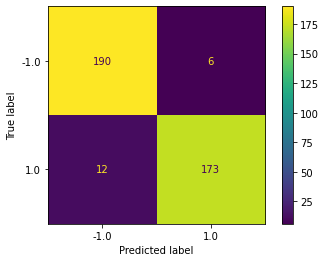

In [8]:
y_pred1=clf.predict(X_test1)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1, values_format='.5g')

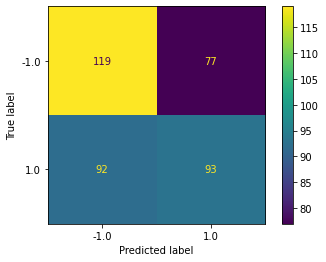

0.5564304461942258
0.5470588235294118
0.5027027027027027


In [16]:
# q 7-8
pca=PCA(n_components=10,random_state=1)
X_train1_r=pca.fit(X_train1).transform(X_train1)
X_test1_r=pca.fit(X_test1).transform(X_test1)
clf=Perceptron(random_state=42,
               eta0=1,max_iter=100,
               shuffle=True,
               validation_fraction=0.1,
               penalty=None,
               fit_intercept=True)
clf.fit(X_train1_r,y_train1)
y_pred1=clf.predict(X_test1_r)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1, values_format='.5g')
plt.show()
print(accuracy_score(y_test1,y_pred1))
print(precision_score(y_test1,y_pred1))
print(recall_score(y_test1,y_pred1))
